# PREDICTING THE AGE OF ABALONE USING NEURAL NETWORKS

## Dataset Information
The boring and time consuming process of predicting the age of Abalone (Marine snails) is usually by cutting the shell through the cone, staining it and counting the number of rings through microscope. The easier and yet effective method is by using an easier to obtain measurements to predict the the number of rings that tells us the age.

In [1]:
#Loading libraries
import pandas as pd
import keras
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

In [2]:
#loading the data
abalone = pd.read_csv("abalone.csv")

In [4]:
# Preprocessing the data    
abalone_copy = abalone.copy()

abalone_copy["Type"] = abalone_copy['Type'].map({'M': 2, 'F': 1, 'I': 0})

In [5]:
# Splitting the data into train and test
abalone_train_full = abalone_copy.sample(frac=0.8, random_state=0)
abalone_test = abalone_copy.drop(abalone_train_full.index)

max_ = abalone_train_full.max(axis=0)
min_ = abalone_train_full.min(axis=0)

abalone_train_full = (abalone_train_full - min_) / (max_ - min_)
abalone_test = (abalone_test - min_) / (max_ - min_)


X_test = abalone_test.drop('Rings', axis=1)
y_test = abalone_test['Rings']


train_set, valid_set = train_test_split(
    abalone_train_full, test_size=0.5, random_state=0)

X_train = train_set.drop('Rings', axis=1)
y_train = train_set['Rings']

X_valid = valid_set.drop('Rings', axis=1)
y_valid = valid_set['Rings']

## The Model
An input layer of  shape = 8  was used with 64 and 32 hidden layers activation functions of Rectified Linear Units (ReLU), while "Linear" was used as the output layer function since we are predicting number of rings in Abalone which is used to tell the Age and is continuous. 

Furthermore, in compiling the model; Adaptive Moment Estimation (adam) was used as the optimizer and Mean Absolute error (mae) was employed for the loss function.

In [6]:
# shape of the data 
X_train.shape

(1671, 8)

In [7]:
# The model
model = keras.Sequential([
    keras.layers.Input(shape=(8,)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='linear')
])

In [8]:
#Compiline the model
model.compile(
    optimizer='adam',
    loss='mae',

)

In [9]:
#Fit the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=32,
    epochs=100, verbose=0)

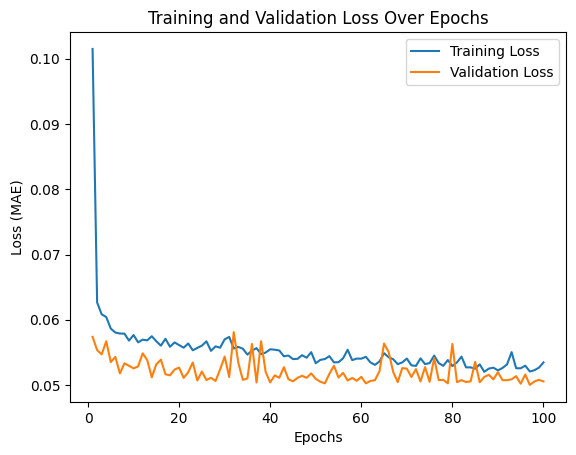

In [10]:
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

plt.plot(range(1, len(training_loss) + 1),
         training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1),
         validation_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (MAE)')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

## Model Performance on Training and Validation Set
The plot below shows that the Mean Absolute error was highest at the first 15 Epochs but however gradually and steadily stabilized up until the 100th Epoch. The validation set on the other hand did not lie too far and repeatedly intertwined with the training MAE error range as the epoch size increased. 

In [11]:
# Evaluate the model
result = model.evaluate(X_test, y_test)
result

27/27 [==============================] - 0s 2ms/step - loss: 0.0556


0.05562657490372658

## Evaluation Result with Testing Data
The testing set produced a Mean Absolute Error of 0.0564 which is significantly low and shows that the model is certainly optimal. This tells us that the prediction by the model is 99.9% close to the actual number of rings in the data set.